<a href="https://colab.research.google.com/github/PuputGaluh/PCVK_244107027014_Puput/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
#Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


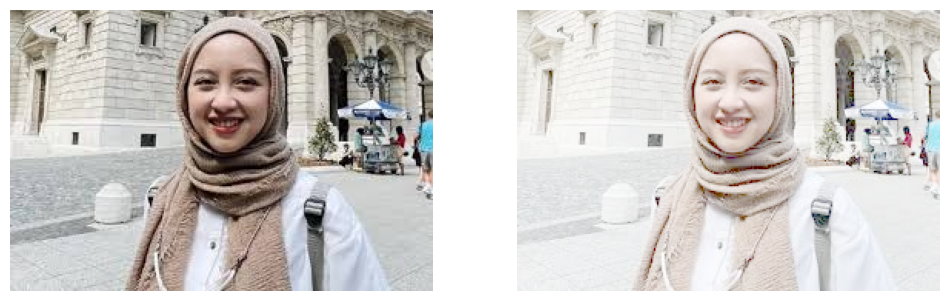

In [46]:
# Fungsi untuk menerapkan Gamma Correction
def gamma_correction(image, gamma_value):
    invGamma = 1.0 / gamma_value
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

# Membaca citra asli
original_image = cv.imread('/content/drive/MyDrive/gita.jpg')  # Ganti dengan path ke gambar Anda
if original_image is None:
    print("Gambar tidak ditemukan")
else:
    print('Gamma Correction pada citra')
    print('----------------------------------')

    # Meminta nilai gamma dari pengguna
    try:
        gamma = float(input('Masukkan nilai Gamma: '))
    except ValueError:
        print('Error, input bukan angka. Menggunakan gamma default = 1')
        gamma = 1

    # Menerapkan Gamma Correction pada citra
    corrected_image = gamma_correction(original_image, gamma)

    # Menampilkan citra asli dan citra yang dikoreksi gamma menggunakan matplotlib
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
    ax[0].axis('off')

    ax[1].imshow(cv.cvtColor(corrected_image, cv.COLOR_BGR2RGB))
    ax[1].axis('off')

    plt.show()

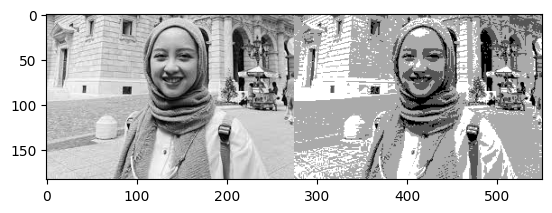

In [45]:
# Menentukan bit depth dan level
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Membaca citra dalam mode grayscale
original = cv.imread('/content/drive/MyDrive/gita.jpg', cv.IMREAD_GRAYSCALE)

# Membuat array kosong untuk citra yang telah diubah bit depth-nya
depth_image = np.zeros(original.shape, original.dtype)

# Proses untuk mengurangi bit depth pada setiap piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        # Mengubah tingkat keabuan berdasarkan bit depth yang baru
        depth_image[y, x] = np.round(original[y, x] / level) * level

# Menggabungkan citra asli dan citra yang telah dikurangi bit depth dalam satu ukuran
combined_image = np.hstack((original, depth_image))

# Menampilkan citra gabungan
plt.imshow(combined_image, cmap='gray')
plt.axis('on')

# Menampilkan grafik
plt.show()

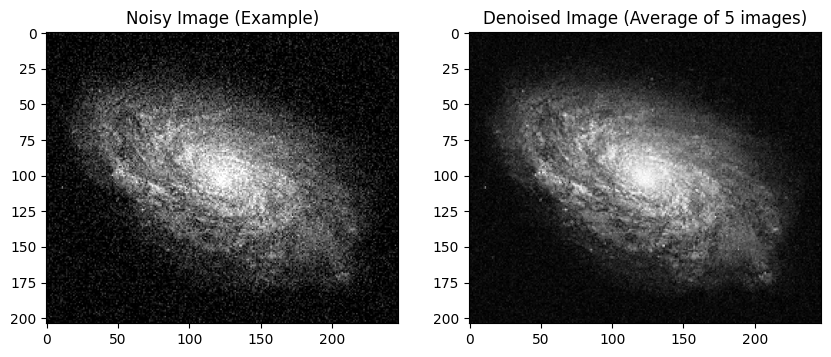

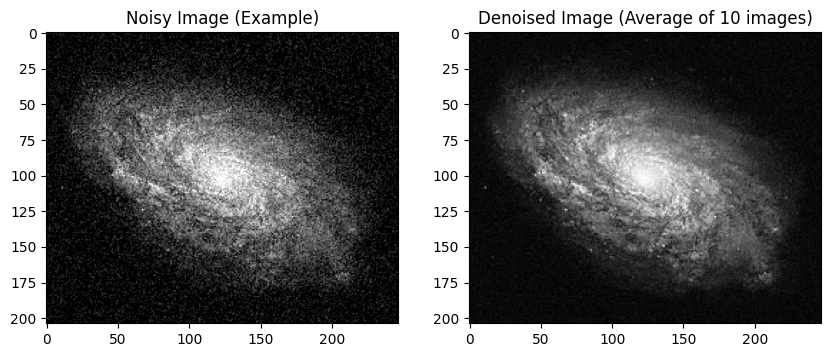

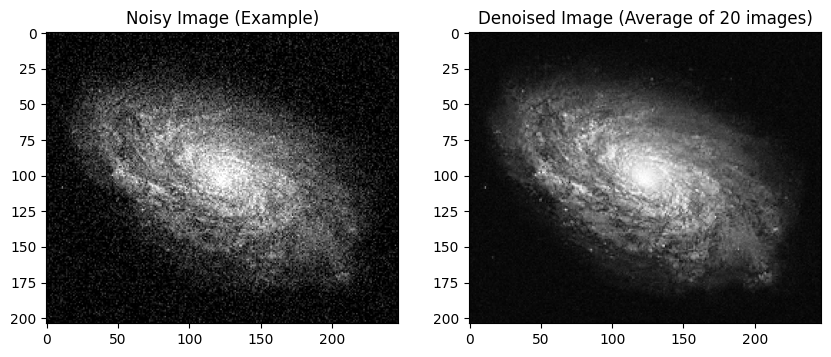

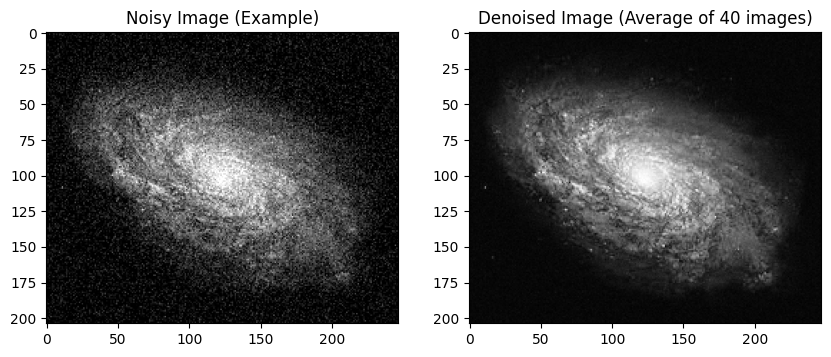

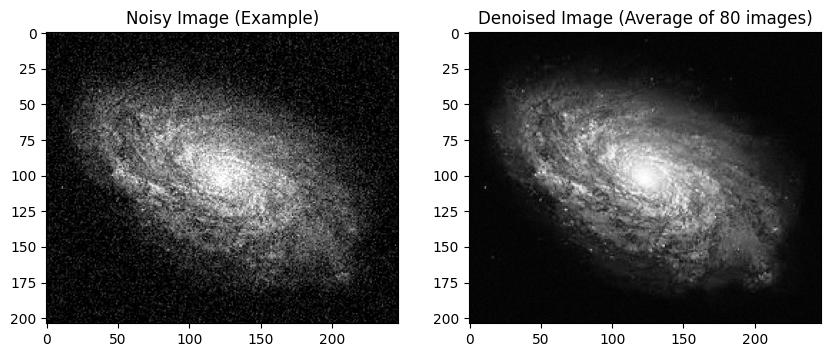

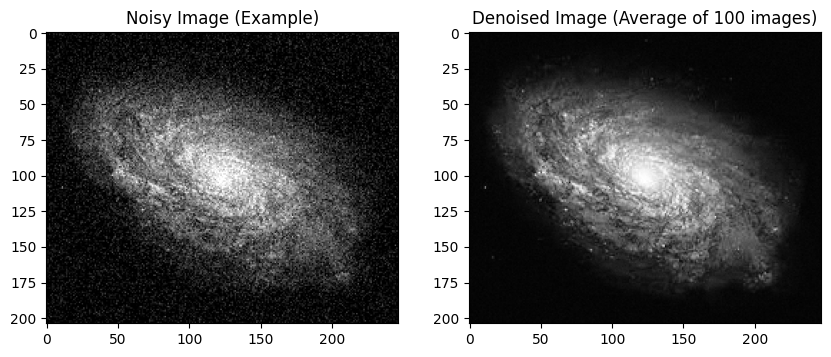

Number of averaged images: 5 - PSNR: 29.95 dB
Number of averaged images: 10 - PSNR: 30.36 dB
Number of averaged images: 20 - PSNR: 30.93 dB
Number of averaged images: 40 - PSNR: 31.55 dB
Number of averaged images: 80 - PSNR: 32.03 dB
Number of averaged images: 100 - PSNR: 32.13 dB


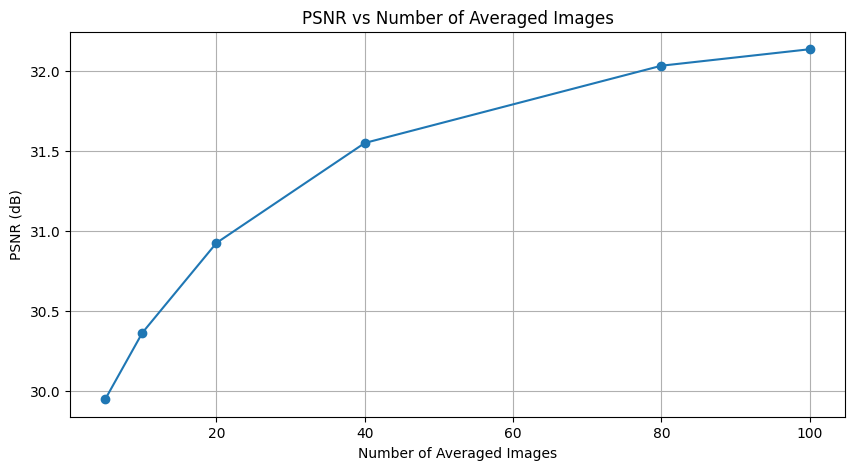

In [47]:
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape)
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

# Read the original image
original = cv2.imread('/content/drive/MyDrive/galaxy.jpg', cv2.IMREAD_GRAYSCALE)

# Generate noisy versions of the image
num_noisy_images = 100
noisy_images = [add_gaussian_noise(original) for _ in range(num_noisy_images)]

# List of number of images to average
num_images_list = [5, 10, 20, 40, 80, 100]
psnr_values = []

# Loop for average denoising and PSNR calculation
for num_images in num_images_list:
    # Averaging denoising
    avg_image = np.mean(noisy_images[:num_images], axis=0).astype(np.uint8)

    # Calculate PSNR between original and denoised image
    psnr = calculate_psnr(original, avg_image)
    psnr_values.append(psnr)

    # Display denoising results for different number of averaged images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(noisy_images[0], cmap='gray')
    plt.title('Noisy Image (Example)')
    plt.subplot(1, 2, 2)
    plt.imshow(avg_image, cmap='gray')
    plt.title(f'Denoised Image (Average of {num_images} images)')
    plt.show()

# Display PSNR results
for i, num_images in enumerate(num_images_list):
    print(f"Number of averaged images: {num_images} - PSNR: {psnr_values[i]:.2f} dB")

# Plot PSNR vs Number of averaged images
plt.figure(figsize=(10, 5))
plt.plot(num_images_list, psnr_values, marker='o')
plt.title('PSNR vs Number of Averaged Images')
plt.xlabel('Number of Averaged Images')
plt.ylabel('PSNR (dB)')
plt.grid(True)
plt.show()

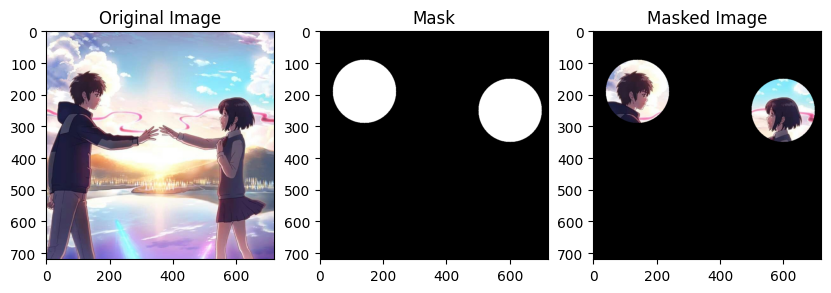

In [68]:
# Membaca citra asli
image = cv2.imread('/content/drive/MyDrive/2.jpeg')

# Mengubah ke RGB (karena OpenCV membaca dalam format BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Membuat mask berbentuk lingkaran untuk objek pertama
mask1 = np.zeros(image_rgb.shape[:2], dtype="uint8")
cv2.circle(mask1, (140, 190), 100, 255, -1)  # Circle di sekitar objek pertama (posisi dan ukuran bisa disesuaikan)

# Membuat mask berbentuk lingkaran untuk objek kedua
mask2 = np.zeros(image_rgb.shape[:2], dtype="uint8")
cv2.circle(mask2, (600, 250), 100, 255, -1)  # Circle di sekitar objek kedua

# Menggabungkan kedua mask
combined_mask = cv2.bitwise_or(mask1, mask2)

# Menerapkan mask pada citra
masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=combined_mask)

# Menampilkan hasil
plt.figure(figsize=(10, 5))

# Menampilkan citra asli
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

# Menampilkan mask yang dibuat
plt.subplot(1, 3, 2)
plt.imshow(combined_mask, cmap='gray')
plt.title('Mask')

# Menampilkan hasil masking (hanya objek di dalam lingkaran yang terlihat)
plt.subplot(1, 3, 3)
plt.imshow(masked_image)
plt.title('Masked Image')

plt.show()

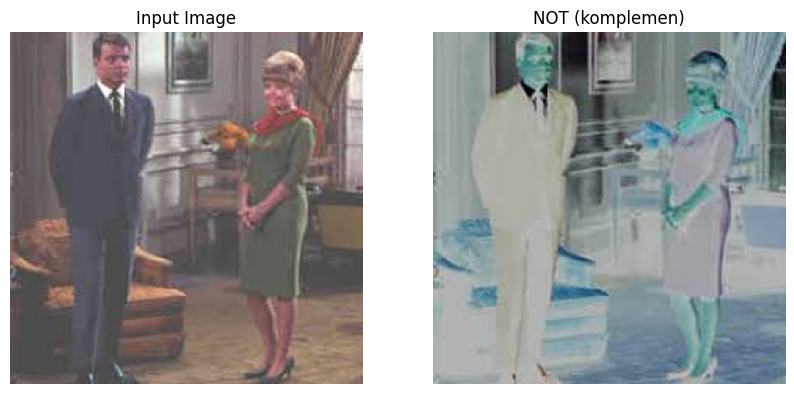

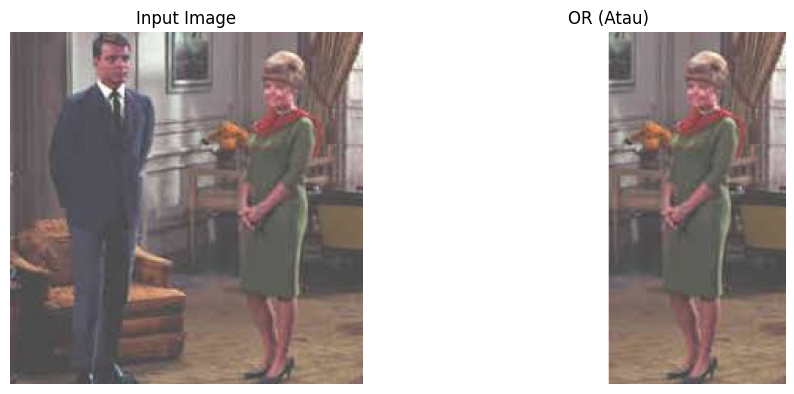

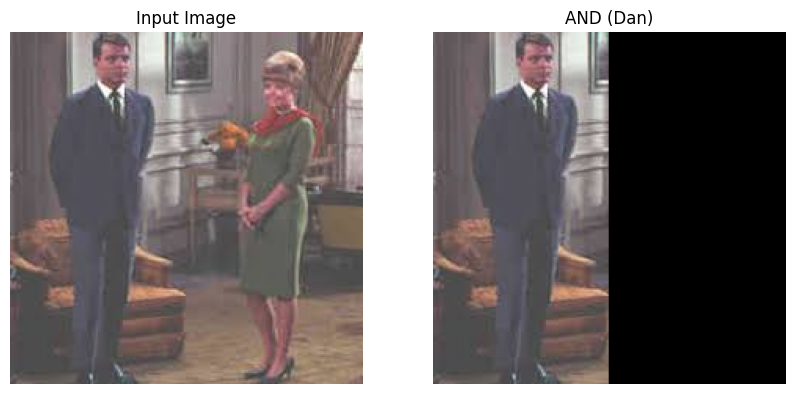

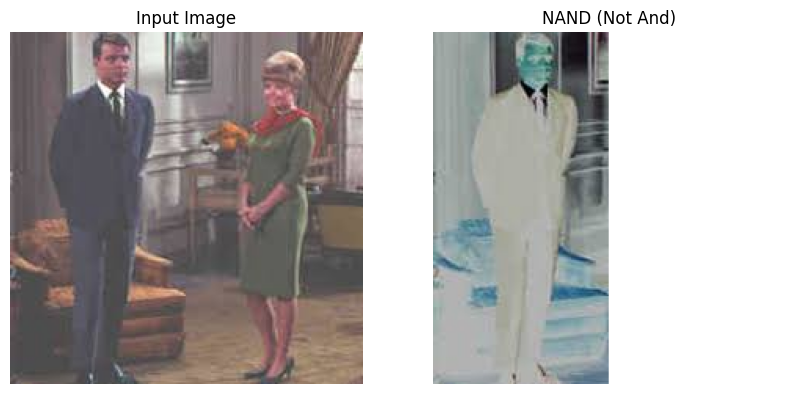

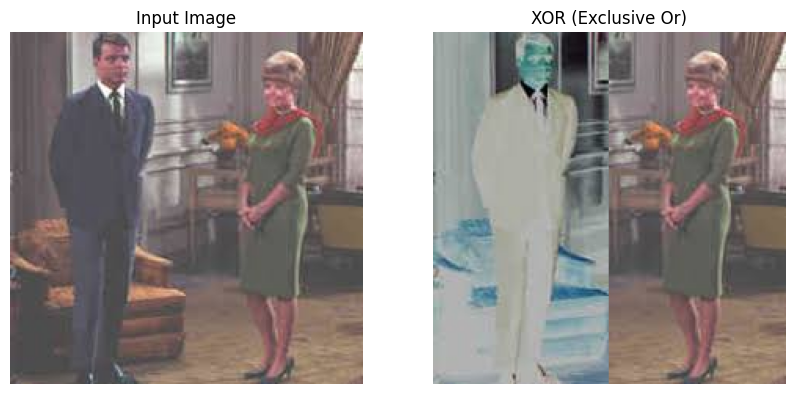

In [49]:
def show_images(title1, image1, title2, image2):
    plt.figure(figsize=(10,5))
    plt.subplot(121), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title(title1), plt.axis('off')
    plt.subplot(122), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title(title2), plt.axis('off')
    plt.show()

# Baca gambar input
img = cv2.imread('/content/drive/MyDrive/2orang.jpg')

# Buat mask (contoh: setengah gambar putih, setengah hitam)
mask = np.zeros(img.shape, dtype=np.uint8)
mask[:, :img.shape[1]//2] = 255

# Operasi logika
not_img = cv2.bitwise_not(img)
or_img = cv2.bitwise_or(img, mask)
and_img = cv2.bitwise_and(img, mask)
nand_img = cv2.bitwise_not(cv2.bitwise_and(img, mask))
xor_img = cv2.bitwise_xor(img, mask)

# Tampilkan hasil
show_images("Input Image", img, "NOT (komplemen)", not_img)
show_images("Input Image", img, "OR (Atau)", or_img)
show_images("Input Image", img, "AND (Dan)", and_img)
show_images("Input Image", img, "NAND (Not And)", nand_img)
show_images("Input Image", img, "XOR (Exclusive Or)", xor_img)
